# Lógica difusa

A continuación se realizará un ejercicio de programación para demostrar el funcionamiento de la **lógica difusa** en Python 3.8 usando una Jupyter Notebook, cuyo formato interactivo permite introducir código y visualizar su salida en el mismo documento. Para este ejemplo de lógica difusa se utilizará una librería específica llamada `scikit-fuzzy`.

## El problema de la propina

El _problema de la propina_ es un ejemplo común para ilustrar la capacidad de la lógica difusa para generar un comportamiento complejo a partir de un conjunto compacto e intuitivo de reglas expertas.

Vamos a crear un sistema de control difuso   para decidir cuánto dar de propina en un restaurante. Generalmente a la hora de dar propina, se tiene en cuenta el servicio recibido y la calidad de la comida, puntuados entre 0 y 10, para dejar una propina de entre 0 y 25% de la cuenta:

* Antecedentes (entradas)
    * servicio
        * ¿Qué tan bueno fue el servicio del mesero, en una escala del 0 a 10?
        * **Conjunto difuso**: malo, aceptable, muy bueno
    * calidad de la comida
        * ¿Qué tan buena supo la comida, en una escala del 0 al 10?
        * **Conjunto difuso**: mala, regular, muy rica

* Consecuentes (salidas)
    * propina
        * ¿Qué tanto debería dejar de propina, en una escala del 0 al 25% de la cuenta?
        * **Conjunto difuso**: poco, lo normal, mucho

* Reglas
    * SI el _servicio_ fue bueno o la _calidad de la comida_ fue buena, ENTONCES la propina será alta.
    * SI el _servicio_ fue normal, ENTONCES la propina será media.
    * SI el _servicio_ fue deficiente y la _calidad de la comida_ mala, ENTONCES la propina será baja

* Ejemplo
    * Si califiqué las entradas como:
        * el servicio estuvo 9.8
        * la comida estuvo 6.5
    * mi salida sería:
        * dejar propina del 20.2%

## Ejercicio con código

Ahora que conocemos el problema que queremos resolver utilizando lógica difusa, pasaremos a usar la librería mencionada en Python:

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Vamos a definir las variables para objetos de entradas y salidas (antecedentes y consecuentes):

In [2]:
# calidad de comida, valores del 0 al 10
quality = ctrl.Antecedent(np.arange(0, 11), 'quality')
# servicio, valores del 0 al 10
service = ctrl.Antecedent(np.arange(0, 11), 'service')
# propina, valores del 0 al 25
tip = ctrl.Consequent(np.arange(0, 26), 'tip')

Y las funciones de membresía:

C:\Users\netoo\AppData\Local\Programs\Python\Python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\netoo\AppData\Local\Programs\Python\Python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\netoo\AppData\Local\Programs\Python\Python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


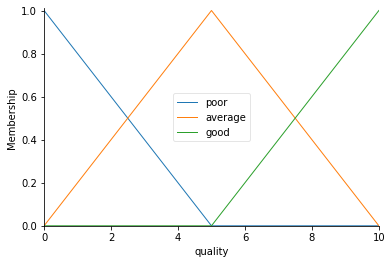

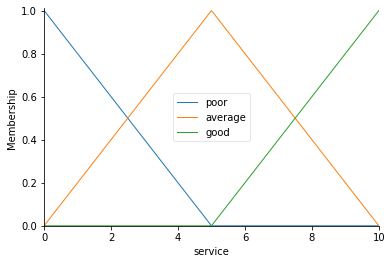

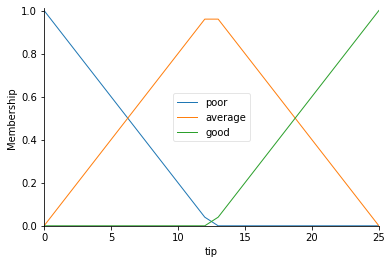

In [3]:
# generar 3 categorías para cada conjunto difuso
quality.automf(3)
service.automf(3)
tip.automf(3)

quality.view();
service.view();
tip.view();

Para poder usar adecuadamente las gráficas anteriores es necesario que definamos las reglas para el problema:

In [4]:
RULES = (
    # si el servicio o calidad son malos, propina baja
    ctrl.Rule(service['poor'] | quality['poor'], tip['poor']),
    # si el servicio es regular, propina regular
    ctrl.Rule(service['average'], tip['average']),
    # si el servicio o calidad son buenos, propina buena
    ctrl.Rule(service['good'] | quality['good'], tip['good'])
)

Finalmente con las categorías establecidas para cada variable y sus rangos, y las reglas para decidir la propina, podemos simular un controlador de lógica difusa:

C:\Users\netoo\AppData\Local\Programs\Python\Python38\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


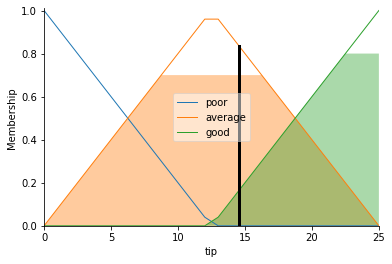

In [5]:
fuzzy_control = ctrl.ControlSystem(RULES)
tipping = ctrl.ControlSystemSimulation(fuzzy_control)

# entradas de ejemplo
tipping.input['quality'] = 9
tipping.input['service'] = 6.5

tipping.compute()
tip.view(sim=tipping);

Debido a que la comida fue muy buena pero el servicio regular, casi malo, el controlador nos indica que deberíamos dejar un poco menos del 15% de propina. Veamos la cantidad exacta:

In [6]:
tipping.output['tip']

14.58388830470849